In [1]:
import pandas as pd
samples_meta = pd.read_excel("samples.xlsx", sheet_name="metadata- treatments")
samples = pd.read_excel("samples.xlsx", sheet_name="sampels")

sensors_25 = pd.read_excel("sensors.xlsx", sheet_name="25 cm")
sensors_50 = pd.read_excel("sensors.xlsx", sheet_name="50 cm")
sensors_75 = pd.read_excel("sensors.xlsx", sheet_name="75 cm")

## Climate Data

,latitude,longitude,et,rain,tmin,tmax,time,date
3,42.439998626709,-76.4599990844727,3.290,1.1,13.9,21.7,00:00:00,2018-03-24
4,42.439998626709,-76.4599990844727,4.250,0.0,7.7,24.9,00:00:00,2018-03-25
5,42.439998626709,-76.4599990844727,4.165,0.0,4.2,31.2,00:00:00,2018-03-26
6,42.439998626709,-76.4599990844727,4.080,0.0,12.9,32.3,00:00:00,2018-03-27
7,42.439998626709,-76.4599990844727,3.160,1.1,13.7,29.8,00:00:00,2018-03-28
...,...,...,...,...,...,...,...,...
158,42.439998626709,-76.4599990844727,7.000,0.0,22.2,33.9,00:00:00,2018-08-26
159,42.439998626709,-76.4599990844727,6.950,0.0,22.2,34.0,00:00:00,2018-08-27
160,42.439998626709,-76.4599990844727,6.350,0.0,21.8,35.7,00:00:00,2018-08-28
161,42.439998626709,-76.4599990844727,5.840,0.0,18.9,38.4,00:00:00,2018-08-29


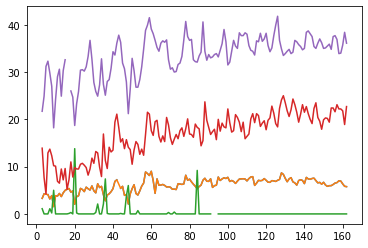

In [2]:

climate = pd.read_excel("climate.xlsx", dtype=str, header=None)


climate = climate.drop([0,1, 2])
climate.columns =  ['latitude', 'longitude', 'et', 'rain', 'tmin',
                    'tmax', 'time', 'date']

# types
climate[['et', 'rain', 'tmin','tmax']] = climate[['et', 'rain', 'tmin','tmax']].astype(float)

# date
climate.date = pd.to_datetime(climate.date).dt.date 

# hour 
climate.time = climate.time.str.split(" ").apply(lambda x: x[1])

# ET filna values
climate.et.plot() # --> better to fill according to average between before and after observations
climate.et = climate.et.fillna((climate.et.shift() + climate.et.shift(-1))/2)
climate.et.plot()

# rain
climate.rain.plot() # --> fill nan with 0
climate.rain.fillna(0, inplace=True)

# tmin & tmax
climate.tmin.plot() # --> fill with average of before and after values
climate.tmax.plot()
climate.tmin = climate.tmin.fillna((climate.tmin.shift() + climate.tmin.shift(-1))/2)
climate.tmax = climate.tmax.fillna((climate.tmax.shift() + climate.tmax.shift(-1))/2)


climate

In [3]:
climate.iloc[:1,:][["longitude", "latitude"]].reset_index(drop=True)

,longitude,latitude
0,-76.4599990844727,42.439998626709


## Sensors Data

In [4]:

# concat sheets
sensors_25["level"] = 25
sensors_50["level"] = 50
sensors_75["level"] = 75

sensors = pd.concat([sensors_25, sensors_50, sensors_75])

# fill long and lat
sensors.Latitude.fillna(method="ffill", inplace=True)
sensors.Longitude.fillna(method="ffill", inplace=True)


# column names
sensors.rename(columns={'Latitude':"latitude", 'Longitude':"longitude", 'Date.1':"date", 'Time':"time", 'Value (Kpa)':"value"}, inplace=True)

sensors.drop("Date", 1, inplace=True)

sensors

,latitude,longitude,date,time,value,level
0,42.439999,-76.459999,2018-05-13,19:46:10.000004,5.812,25
1,42.439999,-76.459999,2018-05-13,20:01:09.999998,5.812,25
2,42.439999,-76.459999,2018-05-13,20:16:10.000001,5.859,25
3,42.439999,-76.459999,2018-05-13,20:31:10.000004,5.859,25
4,42.439999,-76.459999,2018-05-13,20:46:09.999998,5.929,25
...,...,...,...,...,...,...
7589,42.439999,-76.459999,2018-08-01,08:29:29.999996,38.758,75
7590,42.439999,-76.459999,2018-08-01,08:44:29.999999,37.921,75
7591,42.439999,-76.459999,2018-08-01,08:59:30.000002,37.828,75
7592,42.439999,-76.459999,2018-08-01,09:14:29.999996,37.502,75


## Trials Data

In [5]:
# metadata
samples_meta.dropna(how="all", inplace=True)
samples_meta.dropna(axis=1,how="all", inplace=True)



# column names
samples_meta.rename(columns={'Research_ID':"research_id", 'trial_ID':"trial_id", 
                    'treatment ID':"treatment_id", 'tratment timing':"treatment_timing",
                    'treatment date':"treatment_date"}, inplace=True)

# date format 
import re
import datetime

def find_dates(x):
    if isinstance(x, datetime.datetime):
        return [x.date()]
    
    matches = re.findall("(\d{1,}/\d{1,}/\d{4})",x)
    if matches: 
        return [pd.to_datetime(d).date() for d in matches]
    matches = re.findall("(\w{3}[ ]?\,[ ]?\d{1,}[ ]?\,[ ]?\d{4})", x)
    if matches:
        return [pd.to_datetime(d).date() for d in matches]
    return x

samples_meta.treatment_date = samples_meta.treatment_date.apply(lambda x: find_dates(x))   



samples_meta

,research_id,trial_id,treatment_id,treatment_timing,treatment_date
0,51.0,1.0,1.0,Oat,[2012-05-18]
1,51.0,1.0,2.0,Pre-plant,[2012-08-28]
2,51.0,1.0,3.0,Planting,[2012-09-22]
3,51.0,1.0,4.0,V3 (three-leaf) corn,[2012-10-16]
4,51.0,1.0,5.0,V3 / V6 (six-leaf) corn,"[2012-10-16, 2012-11-01]"
5,51.0,2.0,1.0,Oat,[2012-05-20]
6,51.0,2.0,2.0,Pre-plant,[2012-10-30]
7,51.0,2.0,3.0,Planting,[2012-11-12]
8,51.0,2.0,4.0,V3 (three-leaf) corn,[2012-12-04]
9,51.0,2.0,5.0,V3 / V6 (six-leaf) corn,"[2012-12-04, 2012-04-16]"


In [6]:
# samples data
samples = pd.read_excel("samples.xlsx", sheet_name="sampels")


# drop nan values
samples.dropna(how="all", inplace=True)

# rename columns
samples.columns = [re.sub("\s+", "_",col.strip().lower()).replace('(','').replace(')','') for col in samples.columns]


# process dates 
samples["second_n_date_application"] = samples.second_n_date_application.apply(lambda x: pd.to_datetime(x).date() if isinstance(x, (datetime.datetime, str)) else x)

# treatment id, join with meta data
id_to_timing = samples.groupby(["treatment_id", "n_timing"]).count().reset_index()[["treatment_id","n_timing"]]
id_to_timing = id_to_timing[id_to_timing.treatment_id.astype(str).apply(str.isnumeric)]
meta = pd.merge(samples_meta, id_to_timing, on="treatment_id")

samples = pd.merge(samples, meta[["treatment_id", "n_timing"]], on="n_timing", suffixes=("", "_meta"), how="left")
samples["treatment_id"] = samples.treatment_id_meta.astype(int)
samples.drop("treatment_id_meta",1, inplace=True)

samples

,latitude,longitude,trial,repetition,treatment_id,n_timing,grain_yield,total_biomass,total_n_content,total_ndff,...,corn_planting_date,plant_population,fertilizer_n_rate,product_name,n_date_application,second_n_date_application,ph,soil_organic_matter_som,p_resin_as_extractor,k
0,42.439999,-76.459999,1.0,1.0,1,Oat tillering,11.9,27.0,232.1,50.4,...,2012-10-01,70000.0,180.0,urea,2012-05-18,NaN,5.1,51.0,29.0,4.0
1,42.439999,-76.459999,1.0,1.0,1,Oat tillering,11.9,27.0,232.1,50.4,...,2012-10-01,70000.0,180.0,urea,2012-05-18,NaN,5.1,51.0,29.0,4.0
2,42.439999,-76.459999,1.0,2.0,1,Oat tillering,NaN,25.1,311.4,38.8,...,2012-10-01,70000.0,180.0,urea,2012-05-18,NaN,5.1,51.0,29.0,4.0
3,42.439999,-76.459999,1.0,2.0,1,Oat tillering,NaN,25.1,311.4,38.8,...,2012-10-01,70000.0,180.0,urea,2012-05-18,NaN,5.1,51.0,29.0,4.0
4,42.439999,-76.459999,1.0,3.0,1,Oat tillering,14.2,28.6,249.4,44.5,...,2012-10-01,70000.0,180.0,urea,2012-05-18,NaN,5.1,51.0,29.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,42.439999,-76.459999,2.0,2.0,5,Top dressing V3/V6,12,21.7,292.9,66.3,...,2012-11-13,70000.0,150.0,urea,2012-12-04,2012-04-16,5.5,40.0,19.0,4.2
76,42.439999,-76.459999,2.0,3.0,5,Top dressing V3/V6,8.2,23.3,295.2,85.6,...,2012-11-13,70000.0,150.0,urea,2012-12-04,2012-04-16,5.5,40.0,19.0,4.2
77,42.439999,-76.459999,2.0,3.0,5,Top dressing V3/V6,8.2,23.3,295.2,85.6,...,2012-11-13,70000.0,150.0,urea,2012-12-04,2012-04-16,5.5,40.0,19.0,4.2
78,42.439999,-76.459999,2.0,4.0,5,Top dressing V3/V6,12.1,20.5,319.9,78.0,...,2012-11-13,70000.0,150.0,urea,2012-12-04,2012-04-16,5.5,40.0,19.0,4.2


In [11]:
samples_meta.explode("treatment_date").reset_index(drop=True)

,research_id,trial_id,treatment_id,treatment_timing,treatment_date
0,51.0,1.0,1.0,Oat,2012-05-18
1,51.0,1.0,2.0,Pre-plant,2012-08-28
2,51.0,1.0,3.0,Planting,2012-09-22
3,51.0,1.0,4.0,V3 (three-leaf) corn,2012-10-16
4,51.0,1.0,5.0,V3 / V6 (six-leaf) corn,2012-10-16
5,51.0,1.0,5.0,V3 / V6 (six-leaf) corn,2012-11-01
6,51.0,2.0,1.0,Oat,2012-05-20
7,51.0,2.0,2.0,Pre-plant,2012-10-30
8,51.0,2.0,3.0,Planting,2012-11-12
9,51.0,2.0,4.0,V3 (three-leaf) corn,2012-12-04
